In [30]:
import numpy as np #import the libraries
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [31]:
df=pd.read_csv("insurance.csv")
print('Number of rows and columns in the dataset are: ',df.shape)
df.head(15)

Number of rows and columns in the dataset are:  (1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [32]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [42]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [43]:
df['age'].value_counts()

18    69
19    68
20    29
51    29
45    29
46    29
47    29
48    29
50    29
52    29
28    28
54    28
21    28
27    28
26    28
49    28
25    28
24    28
23    28
22    28
53    28
42    27
44    27
43    27
41    27
40    27
31    27
30    27
29    27
56    26
34    26
33    26
32    26
57    26
55    26
35    25
59    25
58    25
36    25
39    25
38    25
37    25
60    23
61    23
62    23
63    23
64    22
Name: age, dtype: int64

In [35]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [36]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [37]:
df.duplicated().sum()

1

### Insights:
   
   - As there is one duplicate later on, this will be removed and the key metrics will be calculated later on
   - There are no null values
   - The breakdown of values in terms of number of children, sex and age is shown above whereby there are 574 out of the 1338 individuals who do not have a child.

In [38]:
# Understanding each column

df1 = df['sex'].value_counts()
df2 = df['children'].value_counts()
df3 = df['smoker'].value_counts()
df4 = df['region'].value_counts()

print(df1)
print('')
print(df2)
print('')
print(df3)
print('')
print(df4)

male      676
female    662
Name: sex, dtype: int64

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

no     1064
yes     274
Name: smoker, dtype: int64

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


### Charges

In this section I will be looking at the medical charge in comparison to the other variables namely:

- Charge by Age
- Charge by BMI
- Charge by Region 

In [39]:
import plotly.express as px

In [41]:
fig = px.bar(df, x="age", y="charges", title='Charge by Age')
fig.show()

In [23]:
fig = px.bar(df, x="region", y="charges", title='Charge by Region')
fig.show()

Text(0.5, 1.0, 'Charge by BMI')

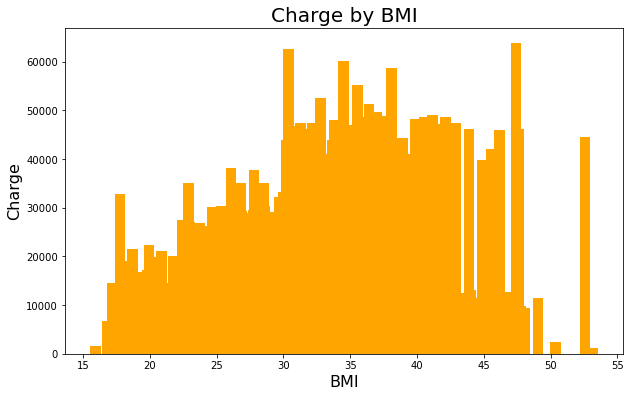

In [24]:
fig, ax = plt.subplots(figsize=(10, 6))
#plt.figure(figsize=(20,10))
 
plt.bar(x=df['bmi'],
        height=df['charges'],  
        color= 'orange')

plt.xlabel('BMI', fontsize = 16)
plt.ylabel('Charge', fontsize= 16)

ax.set_title("Charge by BMI", fontsize= 20)

### Region & Sex Columns

In [25]:
# Region Breakdown

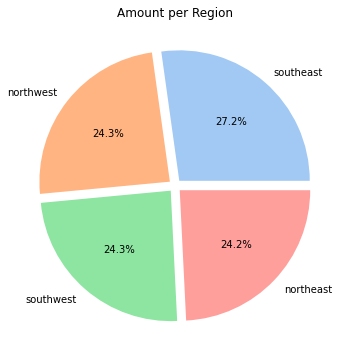

In [26]:
fig, ax = plt.subplots(figsize=(10, 6))

labels = ['southeast', 'northwest', 'southwest', 'northeast']
data = [364, 325, 325, 324]

color = sns.color_palette("pastel", 8)
explode = (0.05, 0.05, 0.05, 0.05)


plt.pie(data, labels = labels, 
        colors = color, explode=explode, autopct='%1.1f%%')


ax.set_title("Amount per Region")
plt.show()

In [17]:
# Sex Breakdown

/Users/rhiannahepburn/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



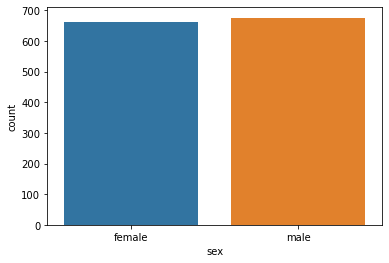

In [18]:
fig = plt.figure(figsize = (6,4))
sns.countplot(df['sex'])
#plt.title('sex distribution')
plt.show()

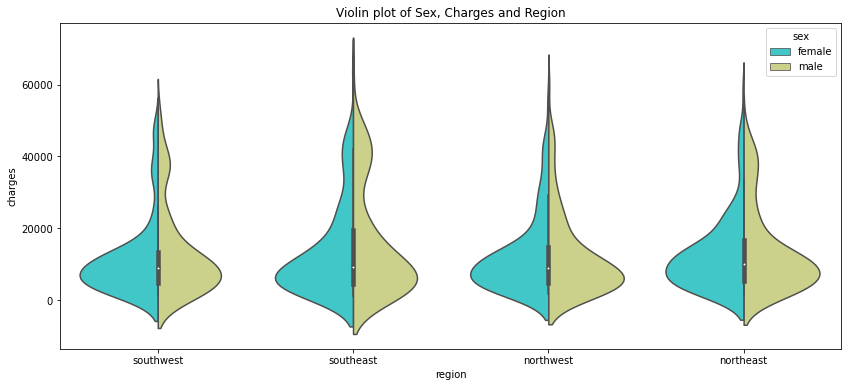

In [32]:
# Sex, Charge & Region
plt.figure(figsize=(14,6))
sns.violinplot(x='region', y='charges',hue='sex',data=df,palette='rainbow',split=True)
plt.title('Violin plot of Sex, Charges and Region');

### Smoker and Childern Columns

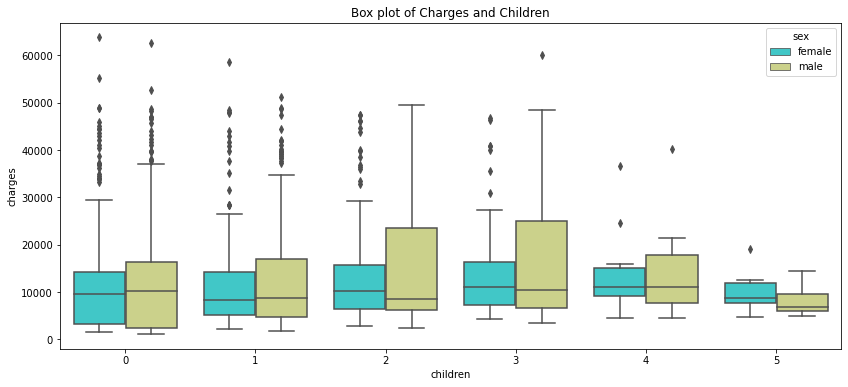

In [33]:
plt.figure(figsize=(14,6))
sns.boxplot(x='children', y='charges',hue='sex',data=df,palette='rainbow')
plt.title('Box plot of Charges and Children');

### Distribution & Correlation Plots

In this section there will be analysis of the distibtuion plots and correlations to see which features/varibles affect charges the most

- #### Distribution Plots

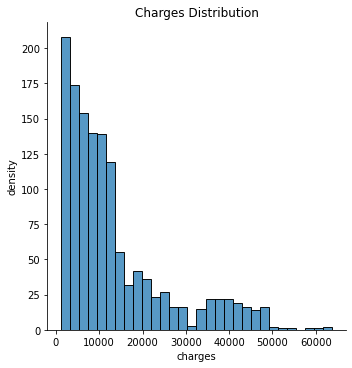

In [24]:
# Charges
sns.displot(df['charges'])
plt.title('Charges Distribution')
plt.ylabel('density')
plt.xlabel('charges')
plt.show()

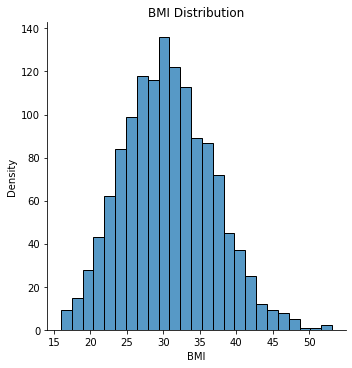

In [26]:
# BMI
sns.displot(df['bmi'])
plt.title('BMI Distribution')
plt.ylabel('Density')
plt.xlabel('BMI')
plt.show()

- #### Correlation Study

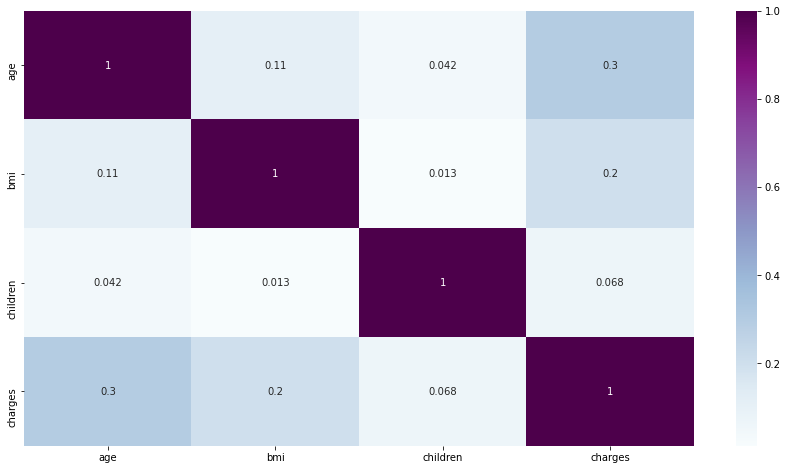

In [34]:
# Before encoding the data

corr = df.corr(method= 'pearson')
plt.figure(figsize=(15,8))
a = sns.heatmap(corr, cmap='BuPu', annot=True)

In [41]:
from sklearn.preprocessing import LabelEncoder

le_sex = LabelEncoder()
le_smoker = LabelEncoder()
le_region = LabelEncoder()

# Label encoding
df['sex_encoded'] = le_sex.fit_transform(df.sex)
df['smoker_encoded'] = le_smoker.fit_transform(df.smoker)
df['region_encoded'] = le_region.fit_transform(df.region)

df_new  = df

In [42]:
df_new = df_new.drop(['sex','smoker','region'], axis=1)

In [43]:
df_new.head()

,age,bmi,children,charges,sex_encoded,smoker_encoded,region_encoded
0,19,27.900,0,16884.92400,0,1,3
1,18,33.770,1,1725.55230,1,0,2
2,28,33.000,3,4449.46200,1,0,2
3,33,22.705,0,21984.47061,1,0,1
4,32,28.880,0,3866.85520,1,0,1


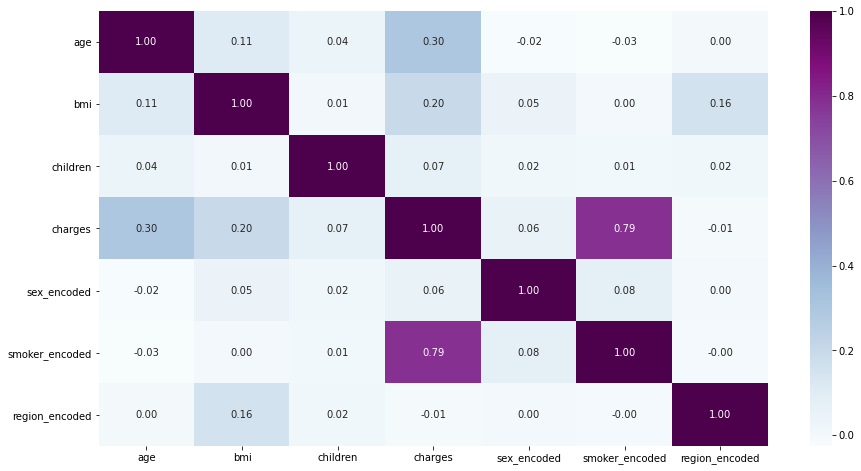

In [45]:
# After encoding the data

correlation_new = df_new.corr(method= 'pearson')
plt.figure(figsize=(15,8))
a = sns.heatmap(correlation_new, cmap='BuPu',annot=True, fmt='.2f')

<Figure size 432x288 with 0 Axes>

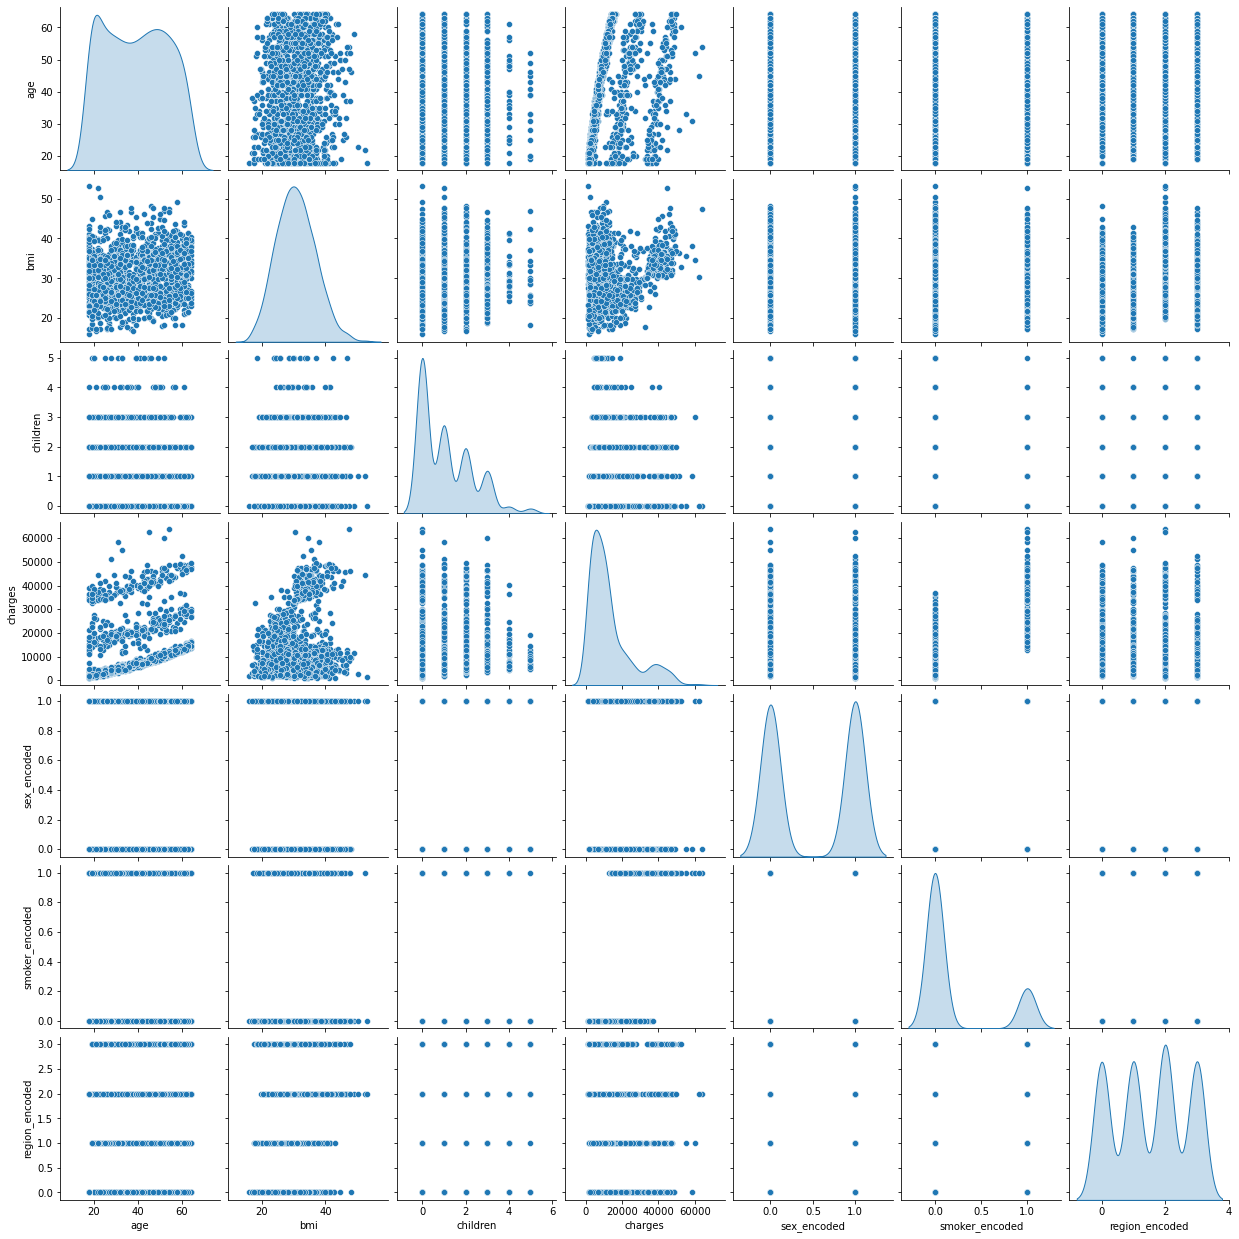

In [47]:
fig = plt.figure(figsize = (6, 4))
sns.pairplot(df_new,diag_kind='kde');